In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from scipy import signal

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/data_rate_2.xlsx')

#df.head(10)

Lying = df[['Lying', 'Unnamed: 2', 'Unnamed: 3']]
Lying = Lying.dropna()
Lying.index = pd.RangeIndex(len(Lying.index))
Lying = Lying.drop(0)
#print(Lying)

Sitting = df[['Sitting', 'Unnamed: 5', 'Unnamed: 6']]
Sitting = Sitting.dropna()
Sitting.index = pd.RangeIndex(len(Sitting.index))
Sitting = Sitting.drop(0)
#print(Sitting)

Standing = df[['Standing', 'Unnamed: 8', 'Unnamed: 9']]
Standing = Standing.dropna()
Standing.index = pd.RangeIndex(len(Standing.index))
Standing = Standing.drop(0)
#print(Standing)

Walking = df[['Normal walking', 'Unnamed: 11', 'Unnamed: 12']]
Walking = Walking.dropna()
Walking.index = pd.RangeIndex(len(Walking.index))
Walking = Walking.drop(0)
#print(Normal_walking)

Jogging = df[['Active walking', 'Unnamed: 14', 'Unnamed: 15']]
Jogging = Jogging.dropna()
Jogging.index = pd.RangeIndex(len(Jogging.index))
Jogging = Jogging.drop(0)
#print(Active_walking)

<Figure size 600x500 with 0 Axes>

<BarContainer object of 5 artists>

Text(0, 4201, '4200')

Text(1, 3433, '3432')

Text(2, 3241, '3240')

Text(3, 4369, '4368')

Text(4, 3031, '3030')

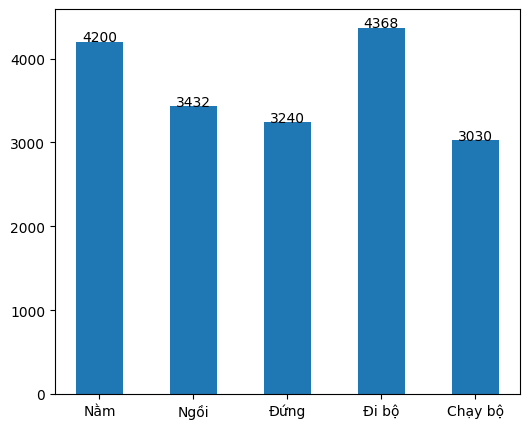

In [3]:
plt.figure (figsize = (6, 5))
label_X = ['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Chạy bộ']
Value_y =[len(Lying), len(Sitting), len(Standing),len(Walking),len(Jogging)]
plt.bar(x = label_X, height = Value_y , width = [0.5,0.5,0.5,0.5,0.5])
x_values = [0, 1, 2, 3, 4]
for i in range(len(label_X)): # your number of bars
  plt.text(x = x_values[i], #takes your x values as horizontal positioning argument
  y = Value_y[i]+1, #takes your y values as vertical positioning argument
  s = Value_y[i], # the labels you want to add to the data
  horizontalalignment='center',
  # verticalalignment='center',
  size = 10)
plt.show()

In [ ]:
Walking

In [5]:
lying_x = Lying['Lying'][0:200]
lying_y = Lying['Unnamed: 2'][0:200]
lying_z = Lying['Unnamed: 3'][0:200]

sit_x = Sitting['Sitting'][0:200]
sit_y = Sitting['Unnamed: 5'][0:200]
sit_z = Sitting['Unnamed: 6'][0:200]

stand_x = Standing['Standing'][0:200]
stand_y = Standing['Unnamed: 8'][0:200]
stand_z= Standing['Unnamed: 9'][0:200]

jog_x = Jogging['Active walking'][0:200]
jog_y = Jogging['Unnamed: 14'][0:200]
jog_z = Jogging['Unnamed: 15'][0:200]

walk_x = Walking['Normal walking'][0:200]
walk_y = Walking['Unnamed: 11'][0:200]
walk_z = Walking['Unnamed: 12'][0:200]

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Nằm')

Text(0, 0.5, 'Số lượng')

Text(0.5, 0, 'Giá trị gia tốc (g)')

(0.0, 75.0)

<Figure size 640x480 with 0 Axes>

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Ngồi')

Text(0, 0.5, 'Số lượng')

Text(0.5, 0, 'Giá trị gia tốc (g)')

(0.0, 100.0)

<Figure size 640x480 with 0 Axes>

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Đứng')

Text(0, 0.5, 'Số lượng')

Text(0.5, 0, 'Giá trị gia tốc (g)')

(0.0, 125.0)

<Figure size 640x480 with 0 Axes>

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Đi bộ')

Text(0, 0.5, 'Số lượng')

Text(0.5, 0, 'Giá trị gia tốc (g)')

(0.0, 50.0)

<Figure size 640x480 with 0 Axes>

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Chạy bộ')

Text(0, 0.5, 'Số lượng')

Text(0.5, 0, 'Giá trị gia tốc (g)')

(0.0, 20.0)

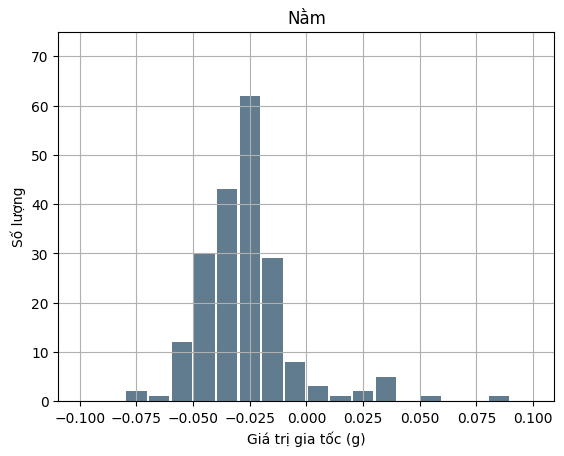

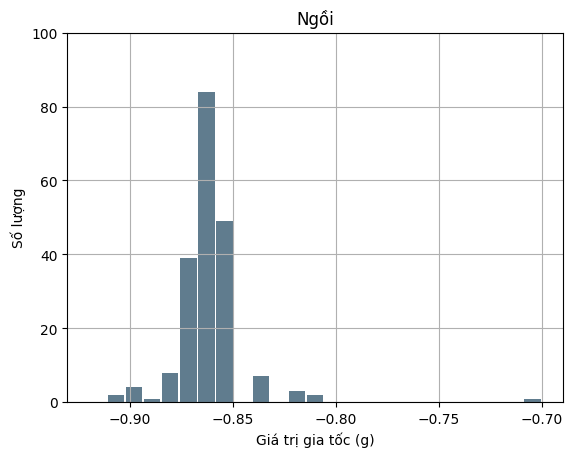

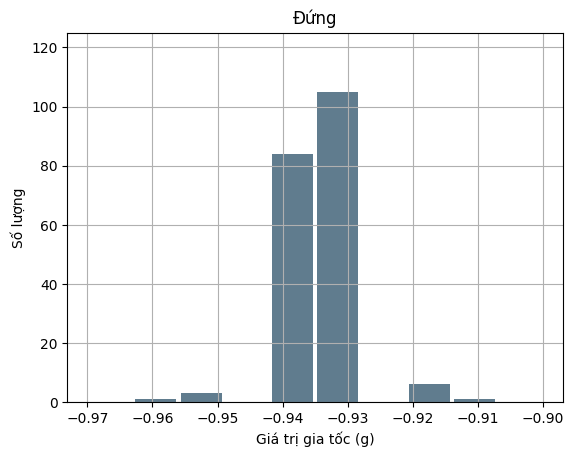

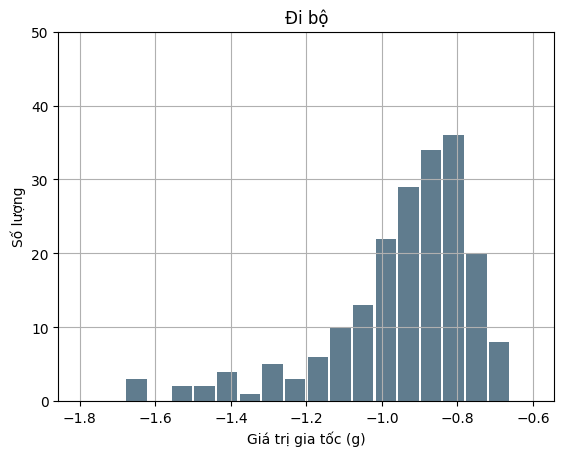

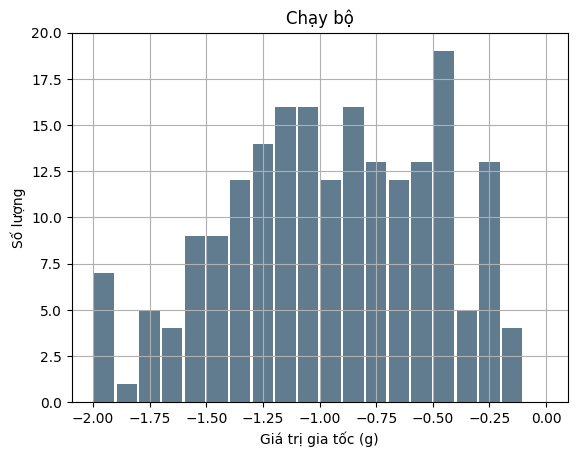

In [6]:
lying_x.plot.hist(grid=True, bins=20, range=[-0.1,0.1], rwidth=0.9, color='#607c8e')
                    #grid=True: tạo thêm lưới dọc
                    #bin: số khoảng giá trị được chia ra từ range, có bao nhiêu counts xuất hiện trong khoảng đó
plt.title('Nằm')
plt.ylabel('Số lượng')
plt.xlabel('Giá trị gia tốc (g)')
plt.ylim([0,75])

plt.figure(2) # show 2 hình trên 2 cửa sổ figure riêng biệt

sit_x.plot.hist(grid=True, bins=25, range=[-0.92,-0.7], rwidth=0.9, color='#607c8e')
                    #grid=True: tạo thêm lưới dọc
                    #bin: số khoảng giá trị được chia ra từ range, có bao nhiêu counts xuất hiện trong khoảng đó
plt.title('Ngồi')
plt.ylabel('Số lượng')
plt.xlabel('Giá trị gia tốc (g)')
plt.ylim([0,100])

plt.figure(3) # show 3 hình trên 3 cửa sổ figure riêng biệt
stand_x.plot.hist(grid=True, bins=10, range=[-0.97,-0.9], rwidth=0.9, color='#607c8e')
                    #grid=True: tạo thêm lưới dọc
                    #bin: số khoảng giá trị được chia ra từ range, có bao nhiêu counts xuất hiện trong khoảng đó
plt.title('Đứng')
plt.ylabel('Số lượng')
plt.xlabel('Giá trị gia tốc (g)')
plt.ylim([0,125])

plt.figure(4) # show 4 hình trên 4 cửa sổ figure riêng biệt
walk_x.plot.hist(grid=True, bins=20, range=[-1.8,-0.6], rwidth=0.9,
                   color='#607c8e')
plt.title('Đi bộ')
plt.ylabel('Số lượng')
plt.xlabel('Giá trị gia tốc (g)')
plt.ylim([0, 50])

plt.figure(5)
jog_x.plot.hist(grid=True, bins=20, range=[-2,0], rwidth=0.9,
                   color='#607c8e')
plt.title('Chạy bộ')
plt.ylabel('Số lượng')
plt.xlabel('Giá trị gia tốc (g)')
plt.ylim([0, 20])

In [7]:
window_size = 10
stride = 5

X_lying= [Lying[i:i+window_size] for i in range(0, int(len(Lying)), stride) if i+window_size<=int(len(Lying))]
print('X_lying: ', len(X_lying))
X_sitting= [Sitting[i:i+window_size] for i in range(0, int(len(Sitting)), stride) if i+window_size<=int(len(Sitting))]
print('X_sitting: ', len(X_sitting))
X_standing = [Standing[i:i+window_size] for i in range(0, int(len(Standing)), stride) if i+window_size<=int(len(Standing))]
print('X_standing: ', len(X_standing))
X_Walking= [Walking[i:i+window_size] for i in range(0, int(len(Walking)), stride) if i+window_size<=int(len(Walking))]
print('X_Walking: ', len(X_Walking))
X_Jogging = [Jogging[i:i+window_size] for i in range(0, int(len(Jogging)), stride) if i+window_size<=int(len(Jogging))]
print('X_Jogging: ', len(X_Jogging))

print('Total:', len(X_sitting) + len(X_standing) + len(X_Walking) + len(X_Jogging) + len(X_lying))

X_lying:  839
X_sitting:  685
X_standing:  647
X_Walking:  872
X_Jogging:  605
Total: 3648


Ngẫu nhiên train test

In [8]:
from sklearn.model_selection import train_test_split #hàm chia ngẫu nhiên tương ứng
RateTrain = 0.7

#chia tập train và test data
arr_lying = np.array(X_lying)
test_lying, train_lying = train_test_split(arr_lying, test_size=RateTrain)
print('test_lying:', len(test_lying))
print('train_lying:', len(train_lying))
arr_sitting = np.array(X_sitting)
test_sitting, train_sitting = train_test_split(arr_sitting, test_size=RateTrain)
print('test_sitting:', len(test_sitting))
print('train_sitting', len(train_sitting))
arr_standing = np.array(X_standing)
test_standing, train_standing = train_test_split(arr_standing, test_size=RateTrain)
print('test_standing:', len(test_standing))
print('train_standing', len(train_standing))
arr_walking = np.array(X_Walking)
test_walking, train_walking = train_test_split(arr_walking, test_size=RateTrain)
print('test_walking:', len(test_walking))
print('train_walking', len(train_walking))
arr_jogging= np.array(X_Jogging)
test_jogging, train_jogging = train_test_split(arr_jogging, test_size=RateTrain)
print('test_jogging:', len(test_jogging))
print('train_jogging', len(train_jogging))
print('train =  ', len(train_sitting)+ len(train_standing) + len(train_walking) + len(train_jogging) + len(train_lying))
print('test =  ', len(test_sitting)+ len(test_standing) + len(test_walking) + len(test_jogging)+len(test_lying))
print('Total =  ', len(train_lying)+ len(train_sitting)+ len(train_standing) + len(train_walking) + len(train_jogging) + len(test_lying)+ len(test_sitting)+ len(test_standing) + len(test_walking) + len(test_jogging))

test_lying: 251
train_lying: 588
test_sitting: 205
train_sitting 480
test_standing: 194
train_standing 453
test_walking: 261
train_walking 611
test_jogging: 181
train_jogging 424
train =   2556
test =   1092
Total =   3648


In [10]:
#tao chuoi du lieu va nhan dung de train
data_train= []
label_train = []

for acts in train_lying:
    data_train.append(pd.DataFrame(acts))
    label_train.append(0)

for acts in train_sitting:
    data_train.append(pd.DataFrame(acts))
    label_train.append(1)

for acts in train_standing:
    data_train.append(pd.DataFrame(acts))
    label_train.append(2)

for acts in train_walking:
    data_train.append(pd.DataFrame(acts))
    label_train.append(3)

for acts in train_jogging:
    data_train.append(pd.DataFrame(acts))
    label_train.append(4)

#tao chuoi du lieu va nhan dung de test
data_test= []
label_test = []

for acts in test_lying:
    data_test.append(pd.DataFrame(acts))
    label_test.append(0)

for acts in test_sitting:
    data_test.append(pd.DataFrame(acts))
    label_test.append(1)

for acts in test_standing:
    data_test.append(pd.DataFrame(acts))
    label_test.append(2)

for acts in test_walking:
    data_test.append(pd.DataFrame(acts))
    label_test.append(3)

for acts in test_jogging:
    data_test.append(pd.DataFrame(acts))
    label_test.append(4)

print('data_train\'s length: ', len(data_train))
print('label_train\'s length: ', len(label_train))

print('data_test\'s length: ', len(data_test))
print('label_test\'s length: ', len(label_test))

data_train's length:  2556
label_train's length:  2556
data_test's length:  1092
label_test's length:  1092


Trích chọn đặc trưng

In [27]:
import joblib
#save
joblib.dump(data_train,'/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/data_train.pkl')
joblib.dump(label_train,'/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/label_train.pkl')
joblib.dump(data_test,'/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/data_test.pkl')
joblib.dump(label_test,'/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/label_test.pkl')

['/content/drive/MyDrive/Colab Notebooks/REV2021/save_data/data_train.pkl']

['/content/drive/MyDrive/Colab Notebooks/REV2021/save_data/label_train.pkl']

['/content/drive/MyDrive/Colab Notebooks/REV2021/save_data/data_test.pkl']

['/content/drive/MyDrive/Colab Notebooks/REV2021/save_data/label_test.pkl']

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline # plot in cell
from sklearn import metrics
import pandas as pd
from scipy import signal
from scipy import stats
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# for svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import entropy
import joblib
data_train= joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/data_train.pkl')
label_train = joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/label_train.pkl')
data_test = joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/data_test.pkl')
label_test= joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/label_test.pkl')

In [ ]:
def featuresFromBuffer(at, fs):
  feat = np.zeros(15)
  x = np.array(at.iloc[:,0], dtype=np.float64)
  y = np.array(at.iloc[:,1], dtype=np.float64)
  z = np.array(at.iloc[:,2], dtype=np.float64)
  # Mean
  means = [np.mean(i) for i in [x, y, z]]
  feat[0:3] = means
  # Root Mean Square
  rms = [np.sqrt(np.mean(i**2)) for i in [x, y, z]]
  feat[3:6] = rms
  # Standard deviation
  std = [np.std(i) for i in [x, y, z]]
  feat[6:9] = std
  # Iqr
  iqr = [np.percentile(i, [75],interpolation='nearest')- np.percentile(i, [25],interpolation='nearest')  for i in [x, y, z]]
  feat[9:12] = iqr
  # Range
  Range = [np.amax(i)-np.amin(i) for i in [x, y, z]]
  feat[12:15] = Range
  return feat
#----------------
train_features = []
for action in data_train:
  feat = featuresFromBuffer(action, 1)
  train_features.append(feat)
test_features = []
for action in data_test:
  feat = featuresFromBuffer(action, 1)
  test_features.append(feat)

In [69]:
feature_names = ['mean_x','mean_y','mean_z',
                  'rms_x','rms_y','rms_z',
                  'std_x','std_y','std_z',
                  'iqr_x','iqr_y','iqr_z',
                  'range_x','range_y','range_z',
                ]

In [19]:
#lower accuracy (nan value -> 0)
np.where(np.isnan(train_features))
train_features = np.nan_to_num(train_features)
np.where(np.isnan(test_features))
test_features = np.nan_to_num(test_features)
print('\nTrain feature:',len(train_features))
print('Label train:',len(label_train))
print('Test feature:',len(test_features))
print('Label test:',len(label_test))

(array([], dtype=int64), array([], dtype=int64))

(array([], dtype=int64), array([], dtype=int64))


Train feature: 2556
Label train: 2556
Test feature: 1092
Label test: 1092


In [41]:
print("Decision Tree:")
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(max_depth=5).fit(train_features, label_train)
predicted_DT = clf_DT.predict(test_features)
confusion_test_DT = confusion_matrix(label_test, predicted_DT)
print('Accuracy of Decision Tree classifier on training set: {:.3f}'.format(clf_DT.score(train_features, label_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(clf_DT.score(test_features, label_test)))

print("\nDecision Tree:")
df_cm_DT = pd.DataFrame(confusion_test_DT, index = [i for i in range(0, 5)], columns = [i for i in range(0, 5)])
print("Ma trận nhầm lẫn DT:")
print(df_cm_DT)

Decision Tree:
Accuracy of Decision Tree classifier on training set: 0.998
Accuracy of Decision Tree classifier on test set: 0.996

Decision Tree:
Ma trận nhầm lẫn DT:
     0    1    2    3    4
0  251    0    0    0    0
1    0  204    0    0    1
2    0    0  194    0    0
3    0    1    0  258    2
4    0    0    0    0  181


In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,10))
clf_DT = DecisionTreeClassifier(max_depth=5).fit(train_features, label_train)
plot_tree(clf_DT, filled = False)
plt.show()

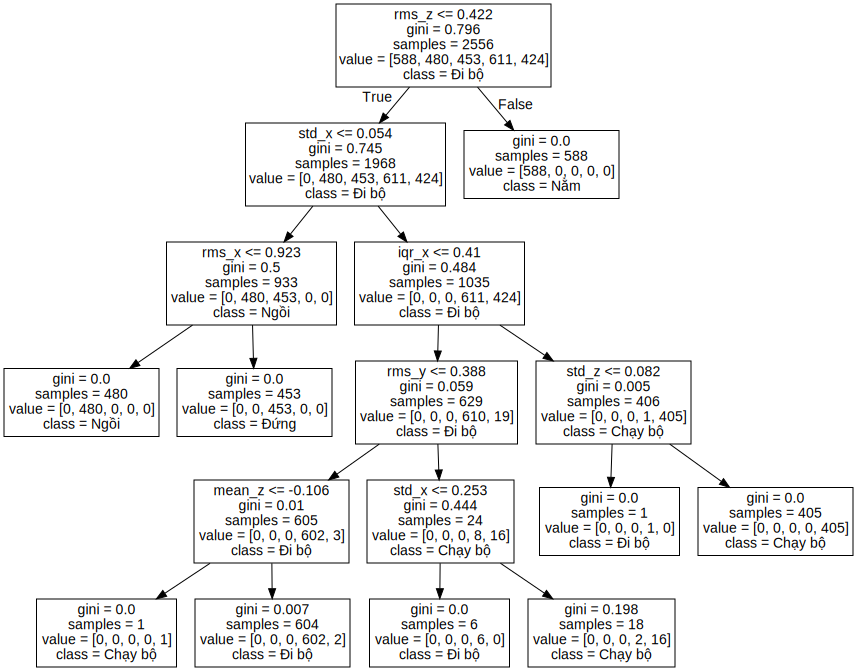

In [72]:
import graphviz
from sklearn import tree
data = tree.export_graphviz(clf_DT, out_file = None)
graph = graphviz.Source(data)
data = tree.export_graphviz(clf_DT, out_file = None, feature_names = feature_names, class_names = label_X, filled = False)
graph = graphviz.Source(data)
graph

In [ ]:
import time
from sklearn.feature_selection import SelectFromModel

print("Gradient Boosting Decision Tree:")
from sklearn.ensemble import GradientBoostingClassifier
clf_GBDT = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,n_estimators=100).fit(train_features, label_train)
predicted_GBDT = clf_GBDT.predict(test_features)
confusion_test_GBDT = confusion_matrix(label_test, predicted_GBDT)
#format: pass score in {:.3f}
print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf_GBDT.score(train_features, label_train)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf_GBDT.score(test_features, label_test)))

print("\n\nSVM:")
clf_SVM = SVC(C=100, gamma='scale').fit(train_features, label_train)
predicted_SVM = clf_SVM.predict(test_features)
confusion_test_SVM = confusion_matrix(label_test, predicted_SVM)
print("Accuracy on training set: {:.2f}".format(clf_SVM.score(train_features, label_train)))
print("Accuracy on test set: {:.2f}".format(clf_SVM.score(test_features, label_test)))

print('\n\nRandom Forests:')
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=200, random_state=0).fit(train_features, label_train)
predicted_RF = clf_RF.predict(test_features)
confusion_test_RF = confusion_matrix(label_test, predicted_RF)
print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf_RF.score(train_features, label_train)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf_RF.score(test_features, label_test)))

start_time = time.time()
print('\n\nK-NN:')
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(train_features, label_train)
start_time1 = time.time()
predicted_KNN = clf_KNN.predict(test_features)
confusion_test_KNN = confusion_matrix(label_test, predicted_KNN)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(clf_KNN.score(train_features, label_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(clf_KNN.score(test_features, label_test)))
start_time2 = time.time()

print("train=",start_time1-start_time)
print("test=",start_time2-start_time1)

In [43]:
data_train = joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/data_train.pkl')
label_train = joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/label_train.pkl')
data_test = joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/data_test.pkl')
label_test= joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/label_test.pkl')

In [44]:
#save
joblib.dump(clf_GBDT,'/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_GBDT.pkl')
joblib.dump(clf_DT,'/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_DT.pkl')
joblib.dump(clf_SVM,'/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_SVM.pkl')
joblib.dump(clf_RF,'/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_RF.pkl')
joblib.dump(clf_KNN,'/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_KNN.pkl')

['/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_GBDT.pkl']

['/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_DT.pkl']

['/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_SVM.pkl']

['/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_RF.pkl']

['/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_KNN.pkl']

In [45]:
clf_GBDT= joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_GBDT.pkl')
clf_DT = joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_DT.pkl')
clf_SVM = joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_SVM.pkl')
clf_RF = joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_RF.pkl')
clf_KNN = joblib.load('/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023/save_data/clf_KNN.pkl')

In [47]:
print("GBDT:")
df_cm_GBDT = pd.DataFrame(confusion_test_GBDT, index = [i for i in range(0, 5)], columns = [i for i in range(0, 5)])
print("Ma trận nhầm lẫn GBDT: ")
print(df_cm_GBDT)

print("\n\nSVM:")
df_cm_SVM = pd.DataFrame(confusion_test_SVM, index = [i for i in range(0, 5)], columns = [i for i in range(0, 5)])
print("Ma trận nhầm lẫn SVM: ")
print(df_cm_SVM)

print('\n\nRandom Forests: ')
df_cm_RF = pd.DataFrame(confusion_test_RF, index = [i for i in range(0, 5)], columns = [i for i in range(0, 5)])
print("Ma trận nhầm lẫn Random Forests: ")
print(df_cm_RF)

print('\n\nKNN: ')
df_cm_KNN = pd.DataFrame(confusion_test_KNN, index = [i for i in range(0, 5)], columns = [i for i in range(0, 5)])
print("Ma trận nhầm lẫn KNN: ")
print(df_cm_KNN)

 GBDT:
Ma trận nhầm lẫn GBDT: 
     0    1    2    3    4
0  251    0    0    0    0
1    0  205    0    0    0
2    0    0  194    0    0
3    0    0    0  257    4
4    0    0    0    0  181


 SVM:
Ma trận nhầm lẫn SVM: 
     0    1    2    3    4
0  251    0    0    0    0
1    0  205    0    0    0
2    0    0  194    0    0
3    0    0    0  261    0
4    0    0    0    0  181


 Random Forests stuffs: 
Ma trận nhầm lẫn Random Forests: 
     0    1    2    3    4
0  251    0    0    0    0
1    0  205    0    0    0
2    0    0  194    0    0
3    0    0    0  259    2
4    0    0    0    0  181


 KNN: 
Ma trận nhầm lẫn KNN: 
     0    1    2    3    4
0  251    0    0    0    0
1    0  205    0    0    0
2    0    0  194    0    0
3    0    0    0  259    2
4    0    0    0    0  181


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
from sklearn.utils.multiclass import unique_labels

target_names = ['Nằm','Ngồi', 'Đứng','Đi bộ', 'Đi nhanh']

y_pred = clf_DT.predict(test_features)
lables = np.concatenate([target_names, ])

from sklearn.metrics import f1_score

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, title=None):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    #metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))

    fig, ax = plt.subplots(figsize = (10,6))
    #Create a 2-dim array include: rows, columns, data
    dataFrame = pd.DataFrame(cm)
    #create a heatmap, annot = True: add text on each cell over heatmap
    sb.heatmap(dataFrame, annot = True)
    ax.set(xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Nhãn thật',
           xlabel='Nhãn dự đoán')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

    sb.set(font_scale = 1.3)

np.set_printoptions(precision=2) #lam tron

plot_confusion_matrix(label_test, y_pred, classes=lables,
        title='\n Ma trận nhầm lẫn DT')

# Plot normalized confusion matrix
plot_confusion_matrix(label_test, y_pred, classes=lables, normalize=True,
        title='\n Ma trận nhầm lẫn DT sau chuẩn hóa')

plt.show()
print ("\nClassification Report: ")
print (classification_report(label_test, y_pred,labels=np.unique(y_pred)))

In [35]:
import os
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/MSC_IoT_2023"
#kết nối các file code con trong thư mục
!pwd && ls
os.chdir(DATA_PATH)

/content
drive  sample_data
